# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

In [111]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import scipy.stats as scs
import collections
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [51]:
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"

In [52]:
# scrape the names of the items on the webpage above
request = requests.get(url)

In [53]:
soup = BeautifulSoup(request.content, 'html.parser')

In [69]:
first_container = soup.findAll('div', class_ = 'product-name')
product_names = []
for i in range(len(first_container)):
    prod_name = first_container[i].find('h3')
    str_prod = str(prod_name)
    product_names.append(str_prod.strip('<h3>').strip('</'))
    
product_names

['Greenies Regular Dental Dog Treats',
 'Greenies Teenie Dental Dog Treats',
 'Greenies Large Dental Dog Treats',
 'Greenies Petite Dental Dog Treats',
 'Authority<sup>®</sup> Dental &amp; DHA Stick Puppy Treats Parsley Mint - Gluten Free, Grain Free',
 'WHIMZEES Brushzees Dental Dog Treat - Natural, Grain Free, 1 Count',
 'Pedigree Dentastix Triple Action Dental Dog Treats - Variety Pack',
 'Pedigree Dentastix Large Dog Treats',
 'Pedigree Dentastix Large Dog Sticks',
 'Authority<sup>®</sup> Dental &amp; DHA Rings Puppy Treats Parsley Mint - Gluten Free, Grain Free',
 'WHIMZEES Veggie Sausage Dog Dental Treat - Natural, 1 Count',
 'Pedigree Dentastix Small/Medium Dog Sticks',
 'Pedigree Dentastix Triple Action Small Dog Treats - Fresh',
 'Greenies Teenie Dog Dental Treats - Blueberry',
 'WHIMZEES Variety Value Box Dental Dog Treat - Natural, Grain Free',
 'Virbac<sup>®</sup> C.E.T.<sup>®</sup> VeggieDent<sup>®</sup> Tartar Control Dog Chews',
 'Yummy Combs<sup>®</sup> Ingenious Flossi

In [70]:
# load the data into a dataframe file
df_products = pd.DataFrame(product_names, columns=['Product Name'], dtype=object)
df_products

,Product Name
0,Greenies Regular Dental Dog Treats
1,Greenies Teenie Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Greenies Petite Dental Dog Treats
4,Authority<sup>®</sup> Dental &amp; DHA Stick P...
5,"WHIMZEES Brushzees Dental Dog Treat - Natural,..."
6,Pedigree Dentastix Triple Action Dental Dog Tr...
7,Pedigree Dentastix Large Dog Treats
8,Pedigree Dentastix Large Dog Sticks
9,Authority<sup>®</sup> Dental &amp; DHA Rings P...


In [71]:
# save the data as a csv file
df_products.to_csv('/Users/jordanrjohnson/DataScienceCourseMaterial/phase_2/topic11-topic13-assessment/data/part1.csv', index=False)

In [72]:
# display df.head()
df_products.head()

,Product Name
0,Greenies Regular Dental Dog Treats
1,Greenies Teenie Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Greenies Petite Dental Dog Treats
4,Authority<sup>®</sup> Dental &amp; DHA Stick P...


# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [74]:
# load in the dataframe, notice it only contains columns salaries, NPS Score, eventOutcome
data = pd.read_csv('/Users/jordanrjohnson/DataScienceCourseMaterial/phase_2/topic11-topic13-assessment/data/part2.csv')
data.head()

,salaries,NPS Score,eventOutcome
0,44112.0,-7.0,1
1,46777.0,-12.0,2
2,50013.0,50.0,5
3,48983.0,-13.0,0
4,50751.0,-11.0,6


In [75]:
def zscores(arr):
    """
    write a function that calculates 
    the zscores of a numpy arr, arr.
    """
    z_scores = []
    mu = np.mean(arr)
    sigma = np.std(arr)
    for x in arr:
        z_scores.append((x-mu)/sigma)
    return np.array(z_scores)

In [85]:
# calculate the zscore for each column and store them as a new column with the names used above

# Could use a for loop for this, but there are only 3 columns...
data['salaries_zscores'] = zscores(data['salaries'])
data['NPS Score_zscores'] = zscores(data['NPS Score'])
data['eventOutcome_zscores'] = zscores(data['eventOutcome'])

data.head()

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS Score_zscores,eventOutcome_zscores
0,44112.0,-7.0,1,-1.460301,-0.913613,-1.103276
1,46777.0,-12.0,2,-0.794061,-1.080776,-0.668162
2,50013.0,50.0,5,0.014927,0.992046,0.637182
3,48983.0,-13.0,0,-0.242569,-1.114209,-1.538391
4,50751.0,-11.0,6,0.199425,-1.047343,1.072296


# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

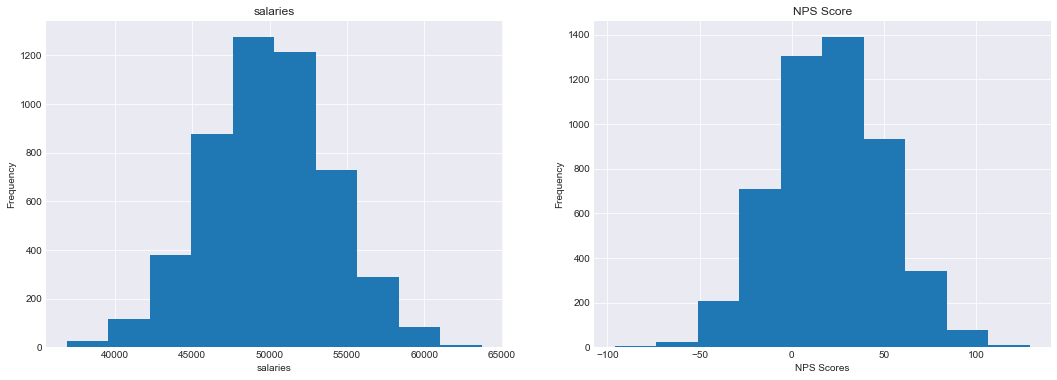

In [108]:
# plot for raw salaries and NPS Score data goes here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.hist(x=data['salaries'], bins=10)
ax1.set_title('salaries')
ax1.set_xlabel('salaries')
ax1.set_ylabel('Frequency')

ax2.hist(x=data['NPS Score'], bins=10)
ax2.set_title('NPS Score')
ax2.set_xlabel('NPS Scores')
ax2.set_ylabel('Frequency')

plt.show()

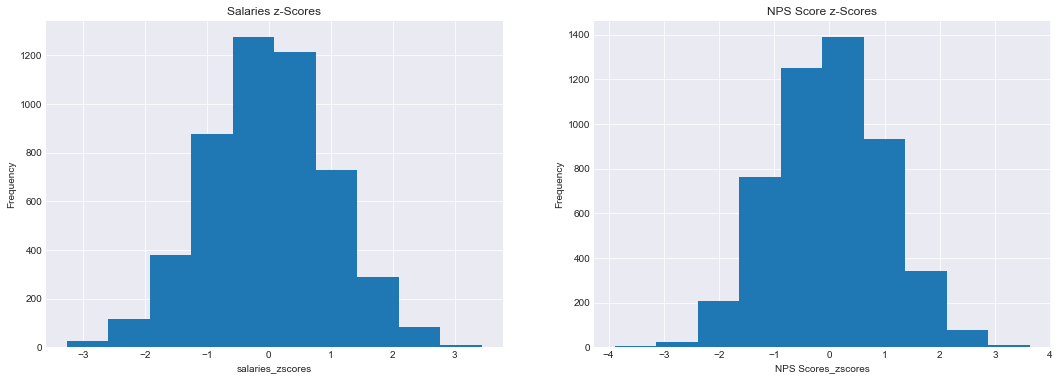

In [109]:
# plot for zscores for salaries and NPS Score data goes here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.hist(x=data['salaries_zscores'], bins=10)
ax1.set_title('Salaries z-Scores')
ax1.set_xlabel('salaries_zscores')
ax1.set_ylabel('Frequency')

ax2.hist(x=data['NPS Score_zscores'], bins=10)
ax2.set_title('NPS Score z-Scores')
ax2.set_xlabel('NPS Scores_zscores')
ax2.set_ylabel('Frequency')

plt.show()

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

In [142]:
counter = collections.Counter(data['eventOutcome'])
length = len(data['eventOutcome'])

pmf = []
for key, val in counter.items():
    pmf.append(round(val/length, 2))

outcomes = sorted(counter.keys())

print(outcomes)
print(pmf)

[0, 1, 2, 3, 4, 5, 6, 7]
[0.12, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13]


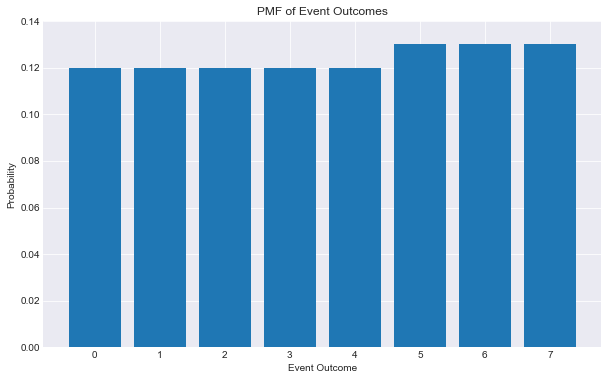

In [143]:
plt.figure(figsize=(10,6))
plt.bar(outcomes, pmf)
plt.title('PMF of Event Outcomes')
plt.ylim(0, 0.14)
plt.ylabel('Probability')
plt.xlabel('Event Outcome')
plt.show()

# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

In [141]:
cdf = np.cumsum(pmf)
cdf_sorted = sorted(cdf)
cdf_sorted

[0.12, 0.24, 0.36, 0.48, 0.6, 0.73, 0.86, 0.99]

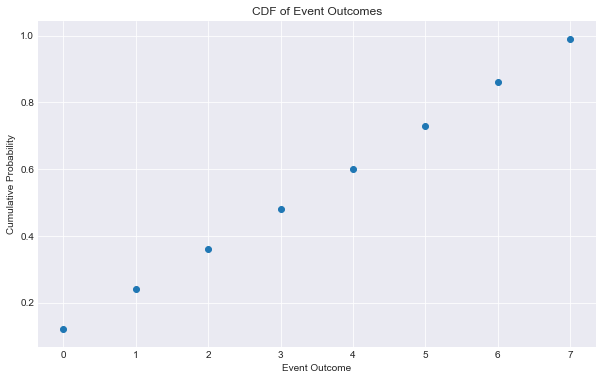

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(outcomes, cdf_sorted)
plt.title('CDF of Event Outcomes')
plt.ylabel('Cumulative Probability')
plt.xlabel('Event Outcome')
plt.show()

# Level Up:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

* plot the pdf and cdf of a given distribution

In [163]:
# find salaries with zscores <= 2.0 
index_sal = np.where(data['salaries_zscores'] <= 2)
salariesz_2_and_under = []

for index in index_sal:
    salariesz_2_and_under.append(data['salaries'][index])

salariesz_2_and_under

[0       44112.0
 1       46777.0
 2       50013.0
 3       48983.0
 4       50751.0
          ...   
 4995    50580.0
 4996    54526.0
 4997    46135.0
 4998    47223.0
 4999    47913.0
 Name: salaries, Length: 4881, dtype: float64]

In [156]:
# calculate skewness and kurtosis of NPS Score column
skewness = scs.skew(data['NPS Score_zscores'])
kurtosis = scs.kurtosis(data['NPS Score_zscores'])

print('Skewness:', skewness)
print('NPS Scores are slightly skewed to the right.')
print('Kurtosis:', kurtosis)
print('NPS Scores have a Platykurtic distribution, indicating light tails and fewer outliers than a normal distribution')

Skewness: 0.02450527688165853
NPS Scores are slightly skewed to the right.
Kurtosis: -0.04212714461681033
NPS Scores have a Platykurtic distribution, indicating light tails and fewer outliers than a normal distribution


# Plotting a pdf and cdf of a normal distribution
A survey is taken that finds that students send an mean average of 80 DMs a day with a standard deviation of 6 DMS. 

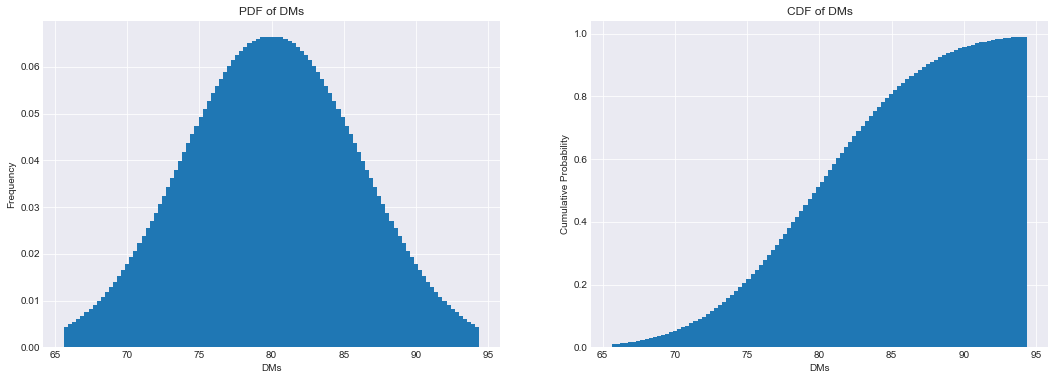

In [158]:
# plot the pdf and cdf of this normal distribution. level up if you can do it in subplots
norm_dist = scs.norm(loc=80, scale=6)
xaxis = np.linspace(norm_dist.ppf(0.01), norm_dist.ppf(.99), 100)
probs = norm_dist.pdf(xaxis)
cum_probs = norm_dist.cdf(xaxis)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.bar(xaxis, probs)
ax1.set_title('PDF of DMs')
ax1.set_xlabel('DMs')
ax1.set_ylabel('Frequency')

ax2.bar(xaxis, cum_probs)
ax2.set_title('CDF of DMs')
ax2.set_xlabel('DMs')
ax2.set_ylabel('Cumulative Probability')

plt.show()

In [159]:
# what is the probability of drawing a student that sends at least 82 DMs a day?
prob_82 = 1- norm_dist.cdf(82)
prob_82

0.36944134018176367

A second survey is taken at another bootcamp that shows that students send a mean average of
80 DMs a day, but they have a standard deviation of 9 DMS.  

In [160]:
# What is the difference in the probability of finding a student that sends, at most, 65 DMs a day? 
norm_dist2 = scs.norm(loc=80, scale=9)
prob_difference = prob_82 - (norm_dist2.cdf(65))
prob_difference

0.32165098790894897

# run the cell below to convert your notebook to a README for assessment

In [164]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md

[NbConvertApp] Converting notebook assessment.ipynb to markdown
[NbConvertApp] Support files will be in assessment_files/
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Writing 18242 bytes to assessment.md
